<a href="https://colab.research.google.com/github/Blusooyeon/Studying_for_Bigdata_Test/blob/main/T2_4_house_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 집 값 예측
* 예측 할 변수 ['SalePrice']
* 평가 : rmse, r2

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("/content/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

In [2]:
import pandas as pd
import numpy as np

X_train.shape , X_test.shape

((1168, 79), (292, 79))

In [3]:
pd.set_option("display.max_columns", 100)
display(X_train.head(3))
display(X_test.head(3))


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,983,1683,GasA,Ex,Y,SBrkr,2129,743,0,2872,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


<Axes: >

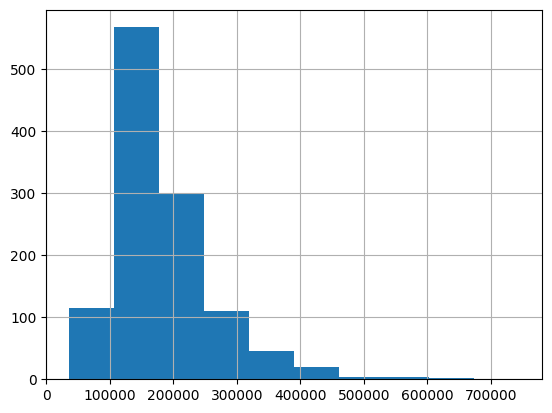

In [4]:
y_train['SalePrice'].hist()

In [6]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [7]:
X_test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageCond       20
GarageFinish     20
BsmtFinType2      9
BsmtCond          8
BsmtFinType1      8
BsmtQual          8
BsmtExposure      8
MasVnrArea        2
MasVnrType        2
BedroomAbvGr      0
BsmtFullBath      0
dtype: int64

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

### 데이터 전처리

In [9]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

In [10]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,36,1237,1337,0,0,1337,1,0,2,0,2,1,5,0,1998.0,2,405,0,199,0,0,0,0,0,3,2006
1418,20,71.0,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1962.0,1,336,0,88,0,0,0,0,0,8,2008
1212,30,50.0,9340,4,6,1941,1950,0.0,344,0,328,672,672,0,0,672,1,0,1,0,2,1,4,0,1941.0,1,234,0,113,0,0,0,0,0,8,2009


In [11]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [12]:
X_train

array([[1.20000000e+02, 3.20000000e+01, 4.50000000e+03, ...,
        0.00000000e+00, 3.00000000e+00, 2.00600000e+03],
       [2.00000000e+01, 7.10000000e+01, 9.20400000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00800000e+03],
       [3.00000000e+01, 5.00000000e+01, 9.34000000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00900000e+03],
       ...,
       [6.00000000e+01, 8.90000000e+01, 1.16450000e+04, ...,
        0.00000000e+00, 8.00000000e+00, 2.00600000e+03],
       [6.00000000e+01, 7.00700837e+01, 7.50000000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.01000000e+03],
       [2.00000000e+01, 6.00000000e+01, 7.35000000e+03, ...,
        0.00000000e+00, 6.00000000e+00, 2.00800000e+03]])

In [13]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

### 모델 구축 및 학습

In [14]:
from sklearn.metrics import mean_squared_error , r2_score

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [16]:
model = XGBRegressor()
model.fit(X_tr, y_tr, verbose=False)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8794330757864643
RMSE : 28870.80060714076


In [18]:
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8558901256691784
RMSE : 31563.968855258718


In [19]:
y = y_train['SalePrice']

final_model =XGBRegressor()
final_model.fit(X_train, y)

prediction = final_model.predict(X_test)

In [20]:
submission = pd.DataFrame(data={
    'Id': y_test.Id,
    'income' : prediction
})

In [21]:
submission.to_csv("12345.csv", index=False)


In [22]:
pred = model.predict(X_test)
print("RMSE : " + str(rmse(y_test['SalePrice'], prediction)))
print("R2 : " + str(r2_score(y_test['SalePrice'], prediction)))

RMSE : 25864.2897494429
R2 : 0.8853635089313441


✅check !
1. rmse는 낮을 수록 좋은 성능           
r2는 높을 수록 좋은 성능              